<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [11]:
# Load the dataset
insurance_df = pd.read_csv(r'C:\Users\sombe\Downloads\insurance.csv')

# Inspect the data
print(insurance_df.head())
print(insurance_df.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   7725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [15]:
# Checking for missing values in the dataset
missing_values = insurance_df.isnull().sum()

# Display missing values for each column
print(missing_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [19]:
# Descriptive statistics for the dataset
descriptive_stats = insurance_df.describe()

# Display the statistics
print(descriptive_stats)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  15799.570247
std      14.049960     6.098187     1.205493  12559.984021
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   8106.480000
50%      39.000000    30.400000     1.000000  12403.585225
75%      51.000000    34.693750     2.000000  18948.612903
max      64.000000    53.130000     5.000000  64571.074480


## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


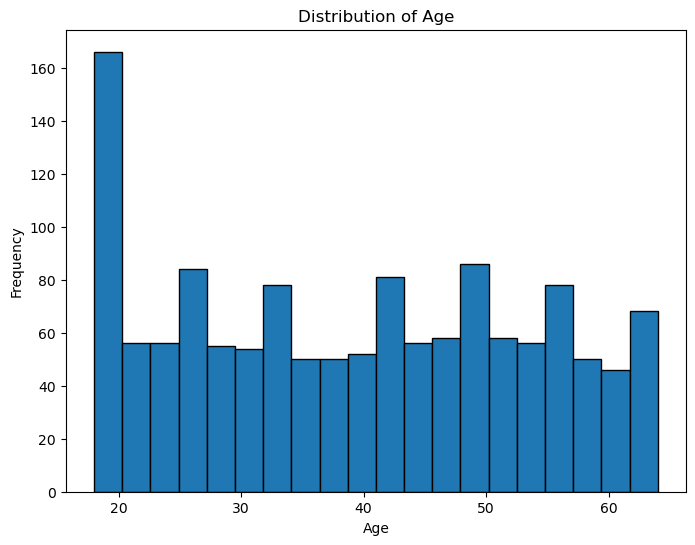

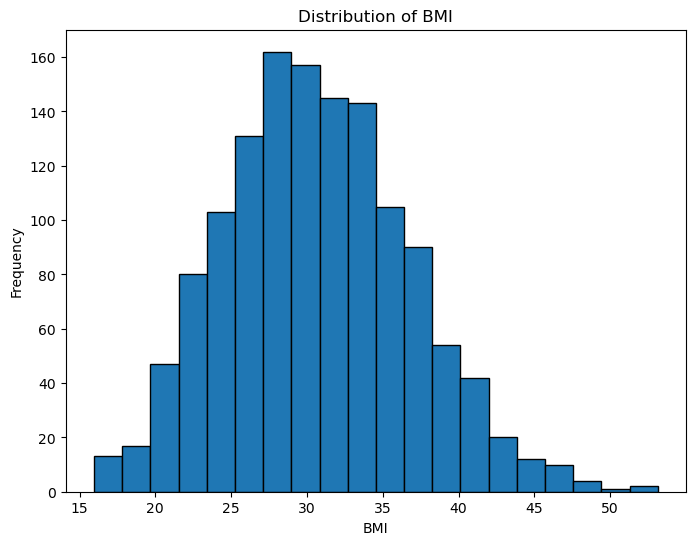

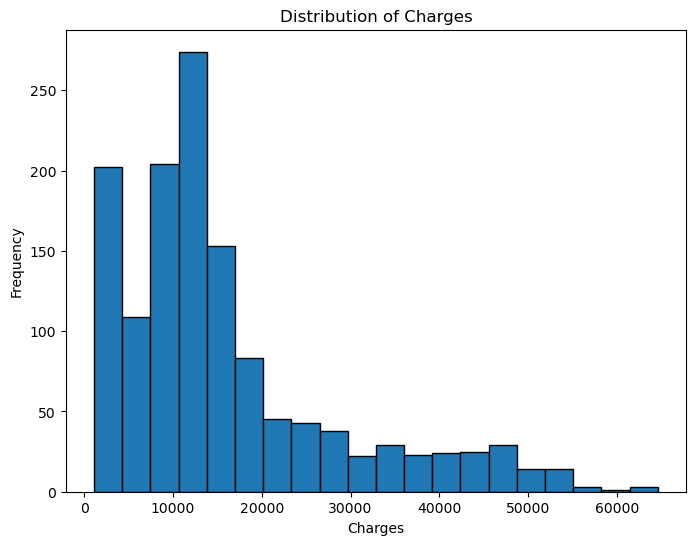

In [23]:
# Plot histogram for 'age'
plt.figure(figsize=(8, 6))
plt.hist(insurance_df['age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'bmi'
plt.figure(figsize=(8, 6))
plt.hist(insurance_df['bmi'], bins=20, edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for 'charges'
plt.figure(figsize=(8, 6))
plt.hist(insurance_df['charges'], bins=20, edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


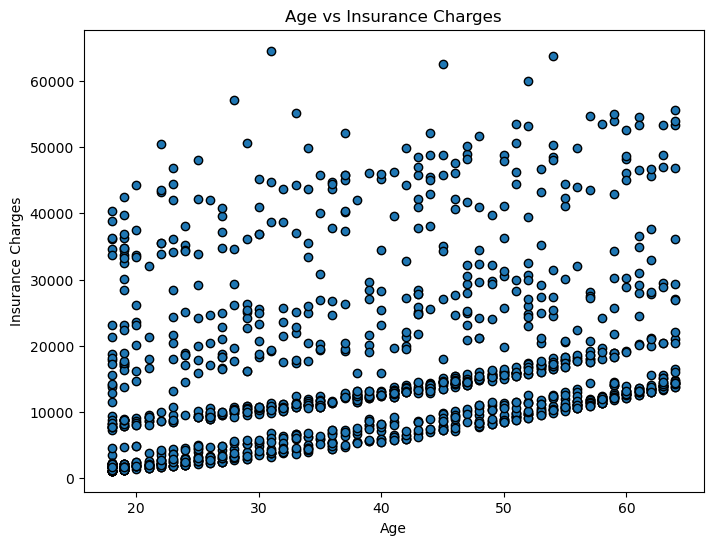

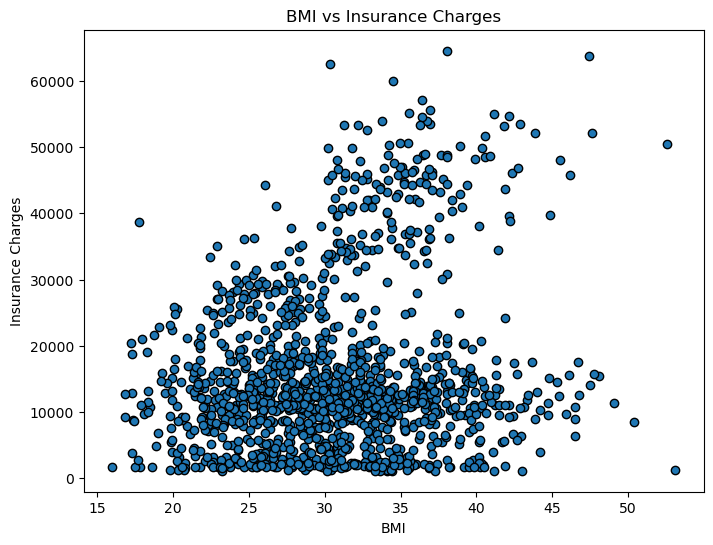

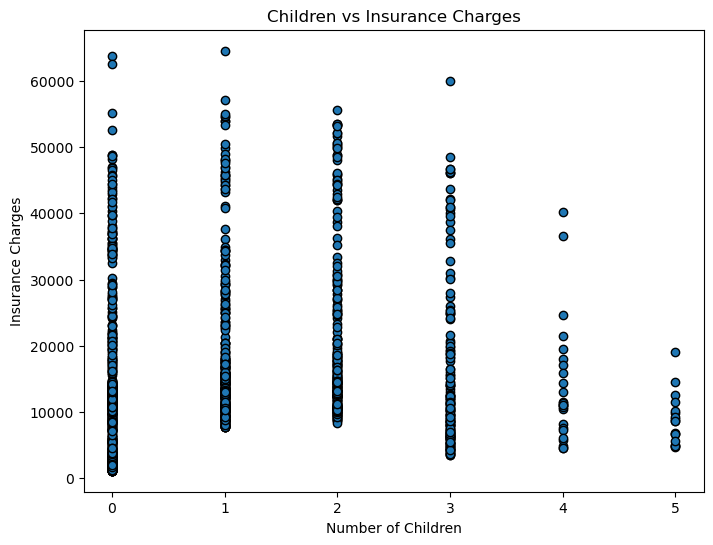

In [25]:
# Scatter plot for 'age' vs 'charges'
plt.figure(figsize=(8, 6))
plt.scatter(insurance_df['age'], insurance_df['charges'], edgecolor='black')
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

# Scatter plot for 'bmi' vs 'charges'
plt.figure(figsize=(8, 6))
plt.scatter(insurance_df['bmi'], insurance_df['charges'], edgecolor='black')
plt.title('BMI vs Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

# Scatter plot for 'children' vs 'charges'
plt.figure(figsize=(8, 6))
plt.scatter(insurance_df['children'], insurance_df['charges'], edgecolor='black')
plt.title('Children vs Insurance Charges')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()


## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


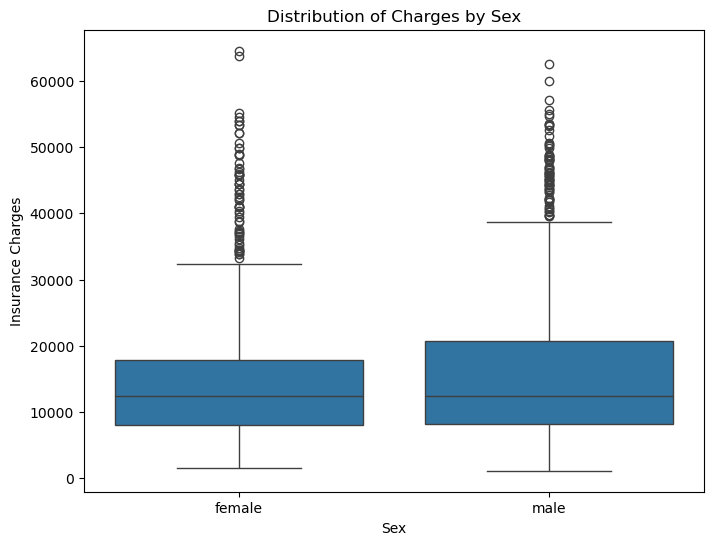

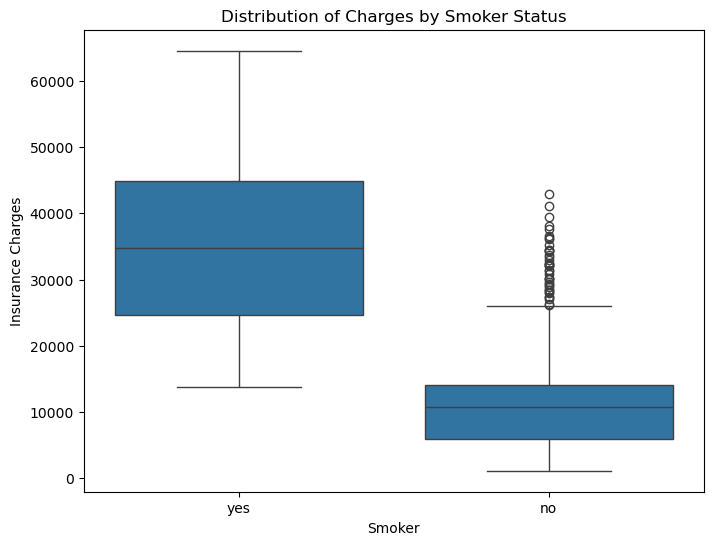

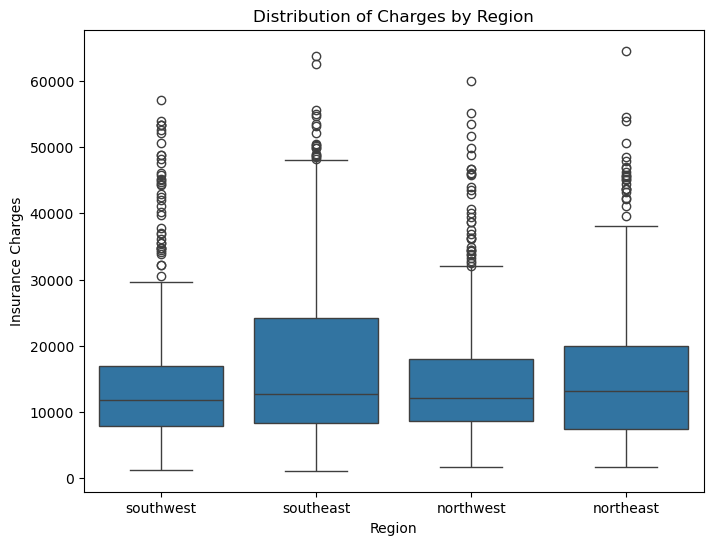

In [29]:
# Plot the distribution of 'charges' for different 'sex'
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=insurance_df)
plt.title('Distribution of Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')
plt.show()

# Plot the distribution of 'charges' for different 'smoker'
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_df)
plt.title('Distribution of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

# Plot the distribution of 'charges' for different 'region'
plt.figure(figsize=(8, 6))
sns.boxplot(x='region', y='charges', data=insurance_df)
plt.title('Distribution of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()


## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


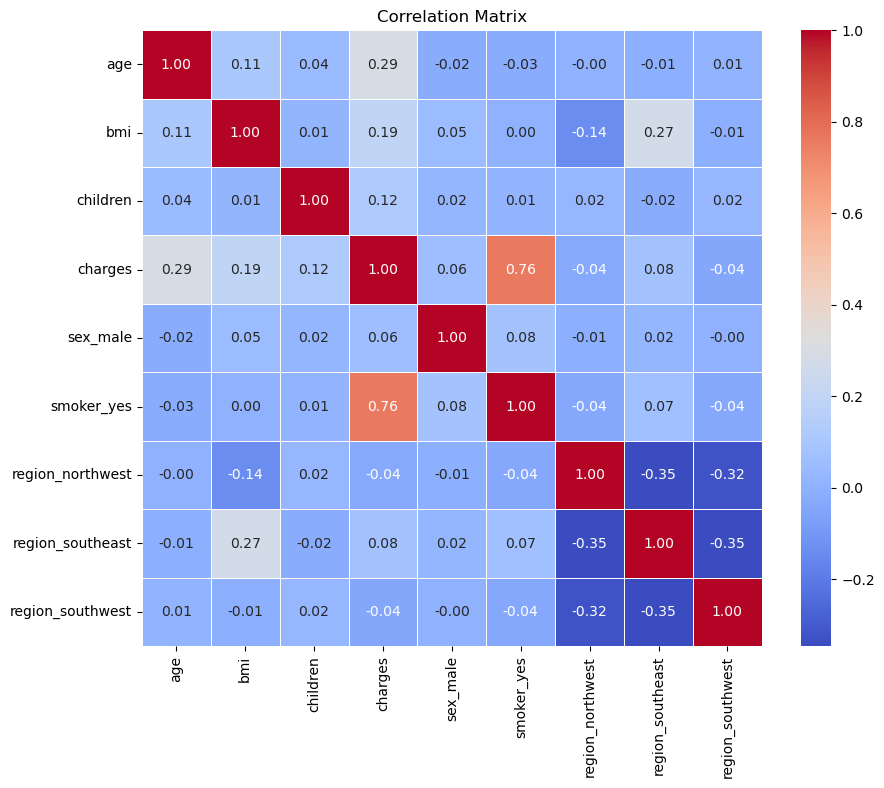

ValueError: could not convert string to float: 'female'

In [45]:
# Apply One-Hot Encoding to categorical columns
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Now calculate the correlation matrix on the encoded dataframe
correlation_matrix = insurance_df_encoded.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Calculate the correlation matrix for the dataset
correlation_matrix = insurance_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline:


In [47]:
# Calculate the mean of the target variable 'charges'
mean_charges = insurance_df['charges'].mean()

# Print the mean value
print(f"The mean value of 'charges' is: {mean_charges}")


The mean value of 'charges' is: 15799.570247204036


#### My answer to "Explain why it's important to establish a naive baseline":
It is important to establish a naive baseline because it provides a simple, interpretable starting point to understand how well the models are performing in comparison.


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


In [63]:
# class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

# Split the data into training and test sets
X = insurance_df_encoded.drop(columns='charges')
y = insurance_df_encoded['charges']

# Train-test split (70% train, 30% test per the instructions given in the challenge)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance using R² and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


R² Score: 0.7263438163107672
Mean Squared Error (MSE): 43014061.454674505


## Initial Modelling with Simple Linear Regression

### **Steps Taken:**
1. **Data Split**: 
   - The dataset was split into **70% training data** and **30% testing data** using `train_test_split`.
   
2. **Model Used**: 
   - We trained a **simple linear regression** model using Scikit-learn's `LinearRegression`.

3. **Model Evaluation**: 
   - The model's performance was evaluated using **R² score** and **Mean Squared Error (MSE)** metrics.

### **Results:**
- **R² Score**: 0.7263438163107672
- **Mean Squared Error (MSE)**: (43014061.454674505)

### **Observations:**
- The model achieved an R² score of X (indicating how well it explained the variance in the target variable).
- The MSE was Y, showing the average squared difference between predicted and actual values.


## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



### Rationale behind each feature:

#### Rationale of interaction between 'bmi' and çhildren': 
Captures the combined effect of BMI and children on insurance charges. High BMI and more children may contribute to higher healthcare costs, so this feature enables the model to learn how these two variables interact.
Age Groups (age_group):

#### Rationale of age category creation: 
Categorizes age into meaningful groups to capture non-linear relationships between age and insurance charges. Different age groups face different levels of health risks, which affect insurance costs, and grouping people by age helps the model learn these patterns more effectively.
High-Risk Indicator (high_risk):

#### Rationale of the creation of a hugh risk indicator: 
Combines smoking and BMI to identify individuals at high risk for health problems. Smokers with high BMI are likely to have higher medical costs and need more care, so this feature allows the model to explicitly account for these individuals in its predictions.

In [71]:
print(insurance_df_encoded.columns)


Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_children_interaction', 'age_group'],
      dtype='object')


In [77]:
# Creating an interaction feature between 'bmi' and 'children'
insurance_df_encoded['bmi_children_interaction'] = insurance_df_encoded['bmi'] * insurance_df_encoded['children']

# Creating age groups based on age
bins = [0, 18, 35, 50, 65, 100]  # Defining the age ranges
labels = ['0-18', '19-35', '36-50', '51-65', '66+']  # Labels for the age ranges
insurance_df_encoded['age_group'] = pd.cut(insurance_df_encoded['age'], bins=bins, labels=labels, right=False)

# Creating a high-risk indicator based on 'smoker_yes' and 'bmi'
insurance_df_encoded['high_risk'] = (insurance_df_encoded['smoker_yes'] == 1) & (insurance_df_encoded['bmi'] > 30)
insurance_df_encoded['high_risk'] = insurance_df_encoded['high_risk'].astype(int)  # Convert to 0 or 1

# Check the first few rows to see if the new features are there
print(insurance_df_encoded.head())


   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   7725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  bmi_children_interaction age_group  \
0             False              True                      0.00     19-35   
1              True             False                     33.77     19-35   
2              True             False                     99.00     19-35   
3             False             False                      0.00     19-35   
4             False             False                      0.00     19-35   

   high_risk  
0          0  
1          0  
2    

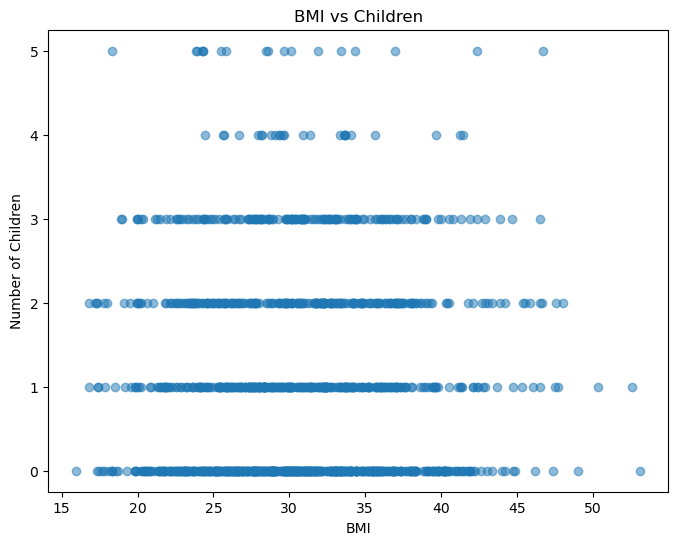

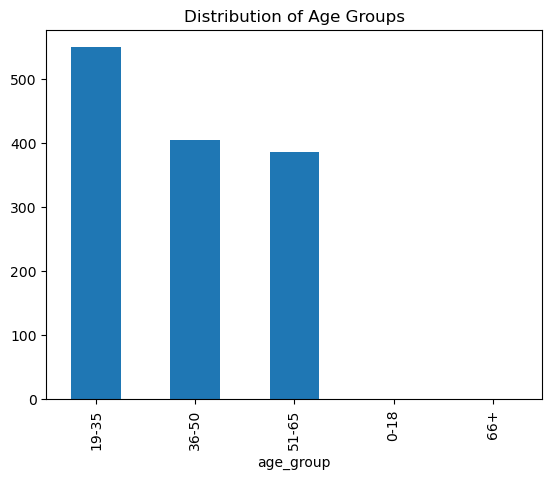

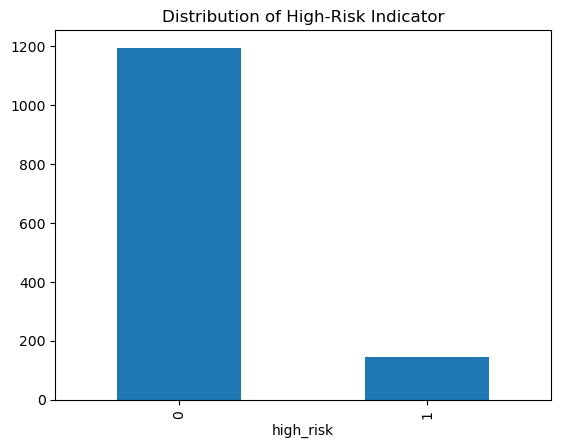

In [84]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Scatter plot of 'bmi' vs 'children'
plt.figure(figsize=(8, 6))
plt.scatter(insurance_df_encoded['bmi'], insurance_df_encoded['children'], alpha=0.5)
plt.title('BMI vs Children')
plt.xlabel('BMI')
plt.ylabel('Number of Children')
plt.show()


# Plot distribution of 'age_group'
insurance_df_encoded['age_group'].value_counts().plot(kind='bar', title='Distribution of Age Groups')
plt.show()

# Plot distribution of 'high_risk'
insurance_df_encoded['high_risk'].value_counts().plot(kind='bar', title='Distribution of High-Risk Indicator')
plt.show()


## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


In [93]:
# Define your features (X) and target (y)
X = insurance_df_encoded.drop(columns='charges')

# One-hot encode categorical columns (like 'age_group')
X = pd.get_dummies(X, columns=['age_group'], drop_first=True)

y = insurance_df_encoded['charges']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using R² and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


R² Score: 0.8231107941775294
Mean Squared Error (MSE): 27803951.17457632


## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


In [99]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('lr', LinearRegression())     # Linear Regression model
])

# Define parameter grid
param_grid = {
    'lr__fit_intercept': [True, False],  # Whether to calculate the intercept
}


# Define GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr', LinearRegression())]),
             n_jobs=-1, param_grid={'lr__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


In [105]:

# Define the pipeline
pipeline_gbr = Pipeline([
    ('scaler', StandardScaler()),           # Scaling the features
    ('gbr', GradientBoostingRegressor())    # Gradient Boosting Regressor model
])

param_grid_gbr = {
    'gbr__n_estimators': [100, 200, 300],       # Number of trees in the forest
    'gbr__learning_rate': [0.01, 0.1, 0.2],     # Step size to update the weights
    'gbr__max_depth': [3, 5, 7]                  # Depth of each tree
}

# Define GridSearchCV with the pipeline and parameter grid
grid_search_gbr = GridSearchCV(pipeline_gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using the training data
grid_search_gbr.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters for Gradient Boosting Regressor:", grid_search_gbr.best_params_)

# Get the best model from the grid search
best_model_gbr = grid_search_gbr.best_estimator_

# Make predictions on the test set
y_pred_gbr = best_model_gbr.predict(X_test)

# Evaluate the model performance using R² and Mean Squared Error (MSE)
r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

# Print the evaluation metrics
print(f"R² Score: {r2_gbr}")
print(f"Mean Squared Error (MSE): {mse_gbr}")


Best Hyperparameters for Gradient Boosting Regressor: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 100}
R² Score: 0.8781869722888114
Mean Squared Error (MSE): 19146920.012226995


## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


In [132]:
# Define the categorical and numerical columns
categorical_columns = ['age_group']  # Assuming 'age_group' is categorical
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Create the ColumnTransformer to apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)  # Handle unseen categories
    ]
)

# Define the models and their parameter grids
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}

param_grids = {
    'Linear Regression': {
        'lr__fit_intercept': [True, False]
    },
    'Gradient Boosting Regressor': {
        'gbr__n_estimators': [100, 200],
        'gbr__learning_rate': [0.01, 0.1, 0.2],
        'gbr__max_depth': [3, 5, 7]
    },
    'Random Forest Regressor': {
        'rfr__n_estimators': [100, 200],
        'rfr__max_depth': [3, 5, 7],
        'rfr__min_samples_split': [2, 5],
        'rfr__min_samples_leaf': [1, 2]
    }
}

# Create pipelines for each model
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('lr', LinearRegression())
    ]),
    'Gradient Boosting Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('gbr', GradientBoostingRegressor())
    ]),
    'Random Forest Regressor': Pipeline([
        ('preprocessor', preprocessor),
        ('rfr', RandomForestRegressor())
    ])
}

# Load the data and split into features (X) and target (y)
X = insurance_df_encoded.drop(columns='charges')
y = insurance_df_encoded['charges']

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define GridSearchCV for each model
best_models = {}

for model_name in models:
    print(f"Performing GridSearchCV for {model_name}...")

    # Define GridSearchCV
    grid_search = GridSearchCV(pipelines[model_name], param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Fit the model with the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best model and hyperparameters
    best_models[model_name] = grid_search.best_estimator_
    
    # Print the best hyperparameters
    print(f"Best Hyperparameters for {model_name}: {grid_search.best_params_}")
    
    # Evaluate the best model on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print the evaluation metrics for each model
    print(f"R² Score for {model_name}: {r2}")
    print(f"Mean Squared Error for {model_name}: {mse}")
    print("-" * 50)


Performing GridSearchCV for Linear Regression...
Best Hyperparameters for Linear Regression: {'lr__fit_intercept': True}
R² Score for Linear Regression: 0.8231107941775293
Mean Squared Error for Linear Regression: 27803951.174576342
--------------------------------------------------
Performing GridSearchCV for Gradient Boosting Regressor...
Best Hyperparameters for Gradient Boosting Regressor: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__n_estimators': 100}
R² Score for Gradient Boosting Regressor: 0.8773863318119463
Mean Squared Error for Gradient Boosting Regressor: 19272766.971761025
--------------------------------------------------
Performing GridSearchCV for Random Forest Regressor...
Best Hyperparameters for Random Forest Regressor: {'rfr__max_depth': 5, 'rfr__min_samples_leaf': 2, 'rfr__min_samples_split': 2, 'rfr__n_estimators': 100}
R² Score for Random Forest Regressor: 0.8754741626353952
Mean Squared Error for Random Forest Regressor: 19573327.1906571
-------------

# Summary of Model Comparison:
Gradient Boosting Regressor:
Best performance with an R² score of 0.8780 and the lowest MSE.
Gradient Boosting is outperforming the other models in both predictive power and error minimization.
Random Forest Regressor:
Very similar performance to Gradient Boosting but slightly worse in terms of R² and MSE. Still, it’s a strong model and likely to perform well in real-world applications.
Linear Regression:
Linear Regression is the simplest model and performs well (R² = 0.8231), but it lags behind Gradient Boosting and Random Forest in terms of both R² and MSE.

# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

In [156]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV

# Assuming grid_search is already defined with model and parameter grid

# Perform GridSearchCV (ensure the process completes without errors)
grid_search.fit(X_train, y_train)

# Check if the grid search has found the best estimator
if hasattr(grid_search, 'best_estimator_'):
    best_model = grid_search.best_estimator_
    print(f"Best Estimator: {best_model}")

    # Make predictions using the best model
    y_pred_final = best_model.predict(X_test)

    # Step 1: Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Step 2: Calculate Underestimation Error
    underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])
    print(f"Underestimation Error: {underestimation_error}")

    # Step 3: Calculate Overestimation Error
    overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])
    print(f"Overestimation Error: {overestimation_error}")

    # Step 4: Calculate Total Potential Cost/Loss
    total_potential_loss = underestimation_error + overestimation_error
    print(f"Total Potential Cost/Loss: {total_potential_loss}")
else:
    print("GridSearchCV has not finished correctly. Please check the results.")


Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bmi', 'children',
                                                   'high_risk']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['age_group',
                                                   'smoker_yes'])])),
                ('gbr', GradientBoostingRegressor())])
Root Mean Squared Error (RMSE): 4382.405277194797
Underestimation Error: 498692.2269804869
Overestimation Error: 539035.24619609
Total Potential Cost/Loss: 1037727.4731765769


In [158]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume the best model is selected from GridSearchCV for each model (e.g., from Gradient Boosting Regressor, Linear Regression, or Random Forest Regressor)
best_model = grid_search.best_estimator_  # Get the best model from GridSearchCV for the chosen model

# Make predictions using the best model
y_pred_final = best_model.predict(X_test)

# Step 1: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Step 2: Calculate Underestimation Error
# Instances where the actual charges are greater than predicted
underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])
print(f"Underestimation Error: {underestimation_error}")

# Step 3: Calculate Overestimation Error
# Instances where the predicted charges are greater than actual
overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])
print(f"Overestimation Error: {overestimation_error}")

# Step 4: Calculate Total Potential Cost/Loss
total_potential_loss = underestimation_error + overestimation_error
print(f"Total Potential Cost/Loss: {total_potential_loss}")


Root Mean Squared Error (RMSE): 4382.405277194797
Underestimation Error: 498692.2269804869
Overestimation Error: 539035.24619609
Total Potential Cost/Loss: 1037727.4731765769


## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
